## Detailed Exploratory Data Analysis of the Titanic ML data set.

In [39]:
# libraries used for data manipulation
import pandas as pd
import numpy as np
# libraries used for predictive modelling
from sklearn import linear_model
# libraries used for data visualizations
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
# ignore warnings from plotting
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read in initial training and testing datasets locally
titanictrain = pd.read_csv('C:\\Users\\timho\\OneDrive\\Desktop\\ML\\Titanictrain.csv')
titanictest = pd.read_csv('C:\\Users\\timho\\OneDrive\\Desktop\\ML\\Titanictest.csv')

#### The training dataset consists of 891 rows and 12 columns. The test dataset consists of 418 rows and 11 columns.

In [4]:
print(titanictest.shape)
print(titanictrain.shape)

(418, 11)
(891, 12)


#### It appears that the dataframe is missing 177 instances of Age and 687 instances of Cabin.

In [5]:
print(titanictrain.isnull().sum())
print(titanictest.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
print(titanictest.describe())
print(titanictrain.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min      

In [7]:
titanictrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titanictest.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### In the training set 500 passengers survived and 300 passengers did not.

<AxesSubplot:>

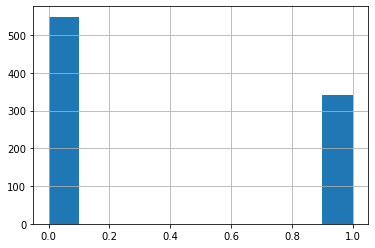

In [9]:
titanictrain['Survived'].hist()

#### Out of the ~900 passengers in the training set two thirds of the passengers were male.

<AxesSubplot:>

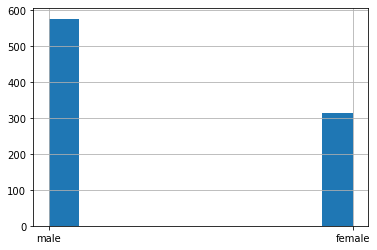

In [11]:
titanictrain['Sex'].hist()

#### It appears that the variables that moved most signicificantly with Survived were the Pclass and Fare variables.

In [13]:
titanictrain.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### Looking at the amount of passengers in 1st, 2nd and 3rd class - the majority of passengers were 3rd passenger class.

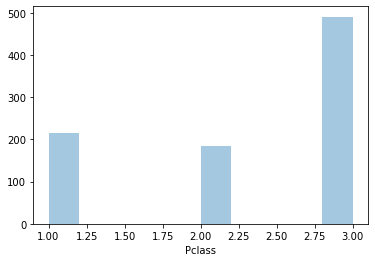

In [21]:
sns.distplot(titanictrain['Pclass'], kde=False)
plt.show()

#### Looking at ages of titanic passengers it appears that the majority of the passengers where ~ 30. Did age have an influence on survival?

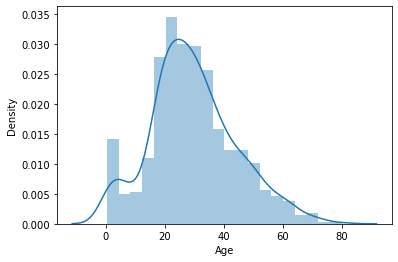

In [30]:
sns.distplot(titanictrain['Age'], hist=True)
plt.show()

#### Age has a negative correlation with Survival which makes sense logically - young and eldery passengers would be given priority on the rescue boats.

In [38]:
corr = titanictrain['Age'].corr(titanictrain['Survived'])
print(round(corr, 3))

-0.077


#### It appears that Passengers in Pclass 1 have a higher survival rate than other Pclasses - This could be due to first class tickets being closer to the top of the boat and closer to escape boats.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

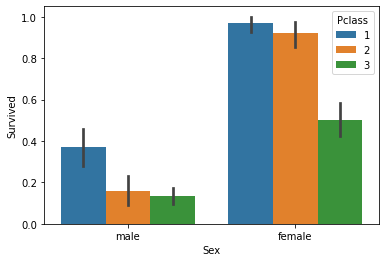

In [29]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=titanictrain)